In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
%store -r

In [5]:
sensors = list(dataframes.keys())

In [6]:
for sensor in sensors:
  print(sensor)
  print(dataframes[sensor].shape[0])
  dataframes[sensor].dropna(inplace=True)
  print(dataframes[sensor].shape[0])

light_maroon_penguin
135233
133935
useless_crimson_rook
73252
71410
closed_wagon_snail
134209
134099
handsome_violet_leech
99265
96519
easily_dear_mouse
19065
19003
daily_ace_bear
39406
39381
bored_blue_fish
13271
13202
highly_master_pony
18077
17678
boring_olive_stingray
133167
132976
lonely_quiet_bear
134973
134935
likely-well-thrush
126564
126516
barely_hot_aphid
27008
26513
mildly_calm_ibex
136761
136752
big_pink_elephant
134406
134352
widely_whole_tarpon
2950
1797
lovely_helped_lamb
13219
12732
duly_star_bee
90965
88974
poorly_sunny_earwig
40554
40548
mainly_kind_boxer
20906
20565
daily_new_falcon
137454
137312
daily_gentle_beetle
38324
37548
weekly_fair_dove
123488
121610
tired_red_monkey
60587
60083
mainly_whole_slug
53624
53624
hardly_usable_boxer
40909
40905
purely_fancy_kite
33401
33223
random_stuck_buffalo
61173
59469
weekly_poetic_guinea
34121
33779
slowly_fast_sawfly
136522
136510
early_still_frog
5158
5110
widely_full_weevil
38178
38090
overly_heroic_squid
136269
136166
c

In [7]:
sns.set(rc = {'figure.figsize':(18,9)})
%config InlineBackend.figure_format = 'retina'

In [9]:
failing_detail = {}
missing = {}

for i in range(len(sensors)):
    df = dataframes[sensors[i]]
    # Convert the 'time' column to datetime format (if it's not already)
    df['time'] = pd.to_datetime(df['time'])

    # Sort the DataFrame by the 'time' column
    df.sort_values('time', inplace=True)

    # Calculate the time difference between consecutive rows
    time_diff = df['time'].diff()

    # Find the indexes where the time difference is greater than one hour (3600 seconds)
    missing_indexes = time_diff[time_diff > pd.Timedelta(hours=1)].index

    missing[sensors[i]] = missing_indexes

    num = len(missing_indexes)

    # maintaining recored of failure for analysis
    failing_detail[sensors[i]] = num

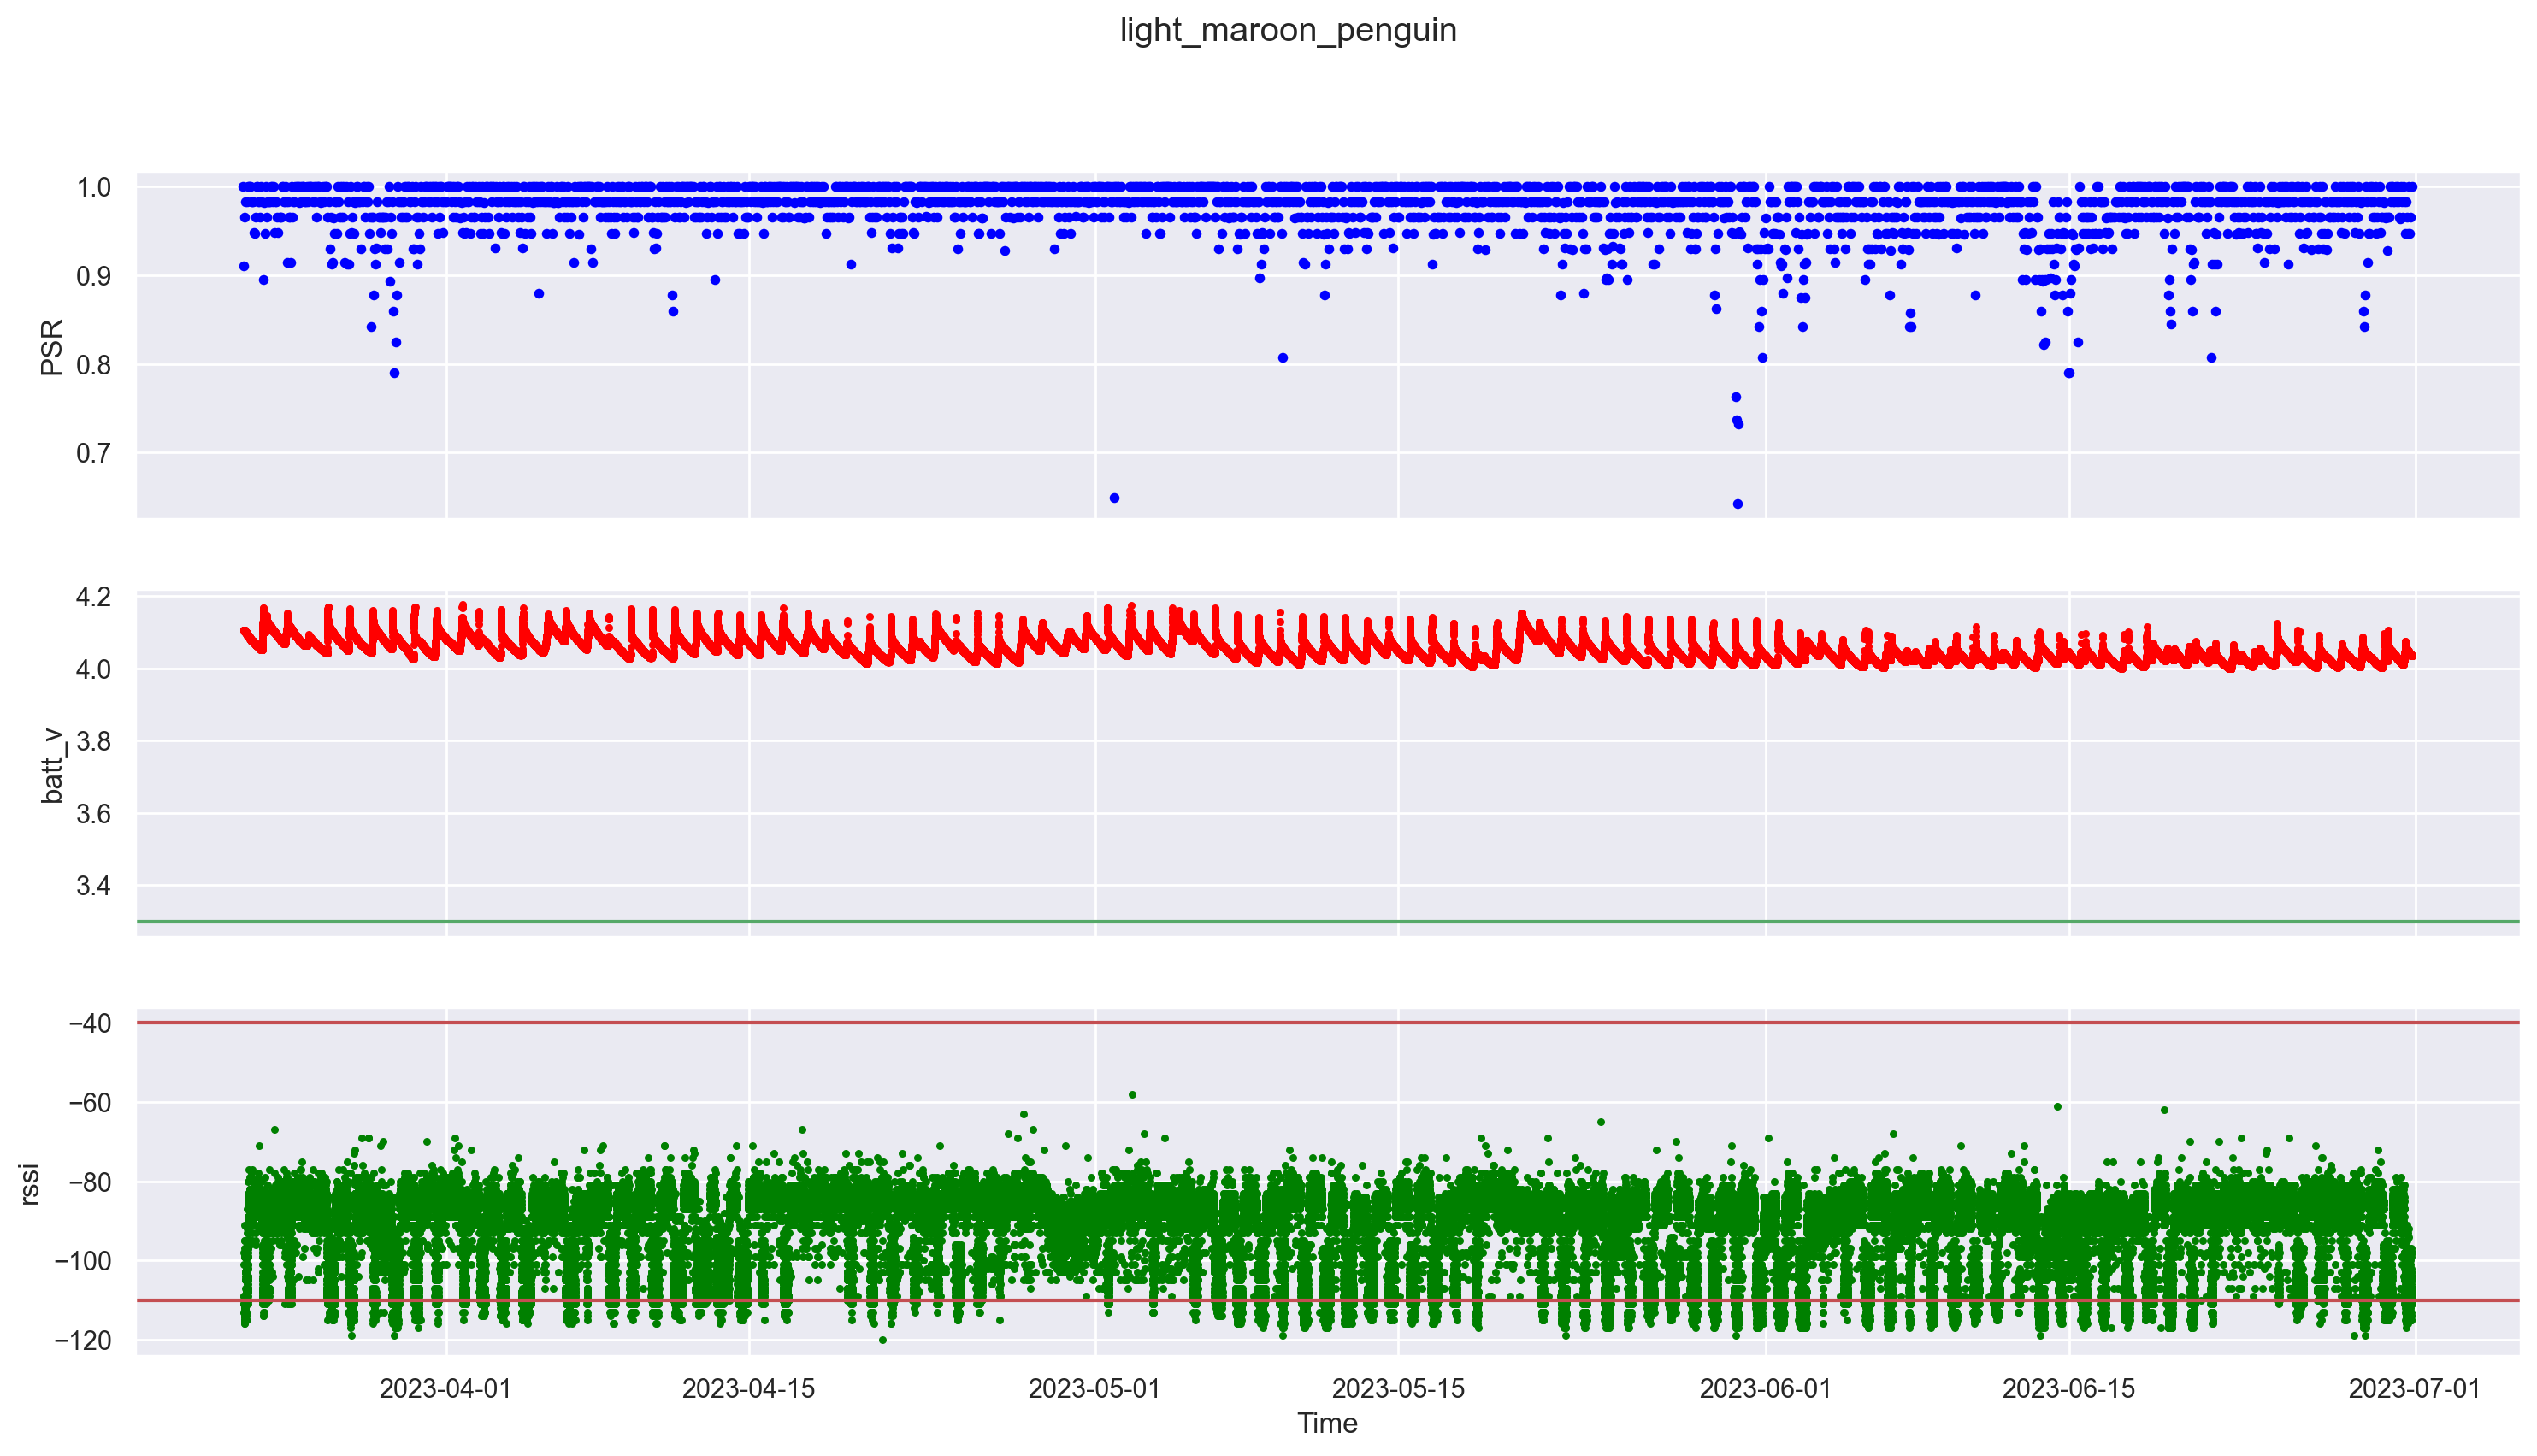

In [14]:
for i, sensor in enumerate(sensors[:1]):
    df = dataframes[sensor]
    df['time'] = pd.to_datetime(df['time'])

    # figuring out subplot
    #plt.subplot(3,1, i+1)

    fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, sharex=True)
    fig.suptitle(sensor)

    # PSR
    hourly_average = df.set_index('time')['f_cnt'].resample('1H').agg({ 'PSR': lambda x: (x.count()/((x.max() - x.min())+1)) })
    psr_data = pd.DataFrame(hourly_average)
    psr_data = psr_data.reset_index(drop=False)
    psr_data = psr_data.rename(columns={'f_cnt': 'PSR'})
    ax1.scatter(psr_data['time'], psr_data['PSR'], s = 10, c = 'blue')
    plt.xlabel('Time')
    ax1.set_ylabel('PSR')

    # battery voltage
    ax2.scatter(df['time'], df['batt_v'], s = 5, c = 'red')
    ax2.axhline(y=3.3, color = 'g')
    ax2.set_ylabel('batt_v')

    # rsi
    ax3.scatter(df['time'], df['gw_1_rssi_dbm'], s = 5, c = 'green')
    ax3.set_ylabel('rssi')
    ax3.axhline(y=-40, color = 'r')
    ax3.axhline(y=-110, color = 'r')

    failure_timestamp = list(df.loc[list(missing[sensor])]['time'])

    for time in failure_timestamp:
        ax1.axvline(x=time, color='r')
        ax3.axvline(x=time, color='r')
        ax2.axvline(x=time, color='r')

    plot_name = 'plot_100/' + sensor + '.png'
    plt.savefig(plot_name)